# Linear Regression Analyisis on VGChartz data
 
 Given the scrape data, we clean and explore the relationships between variables, then train a Gaussian Linear Model to predict future sales

## Cleaning the data

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from dateutil import parser as ps
import datetime as dt
from workalendar.usa import UnitedStates
from workalendar.asia import SouthKorea, China, Japan
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.discrete.discrete_model as smd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import scipy.stats as stats

In /Users/macbookpro/opt/anaconda3/envs/cs7643/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/macbookpro/opt/anaconda3/envs/cs7643/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/macbookpro/opt/anaconda3/envs/cs7643/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/macbookpro/opt/anaconda3/envs/cs7643/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed tw

In [4]:
!pwd

/Users/macbookpro/gt/class/cse6242 viz/CSE-6242-Project/Algo


In [5]:
df_merged=pd.read_csv('../DB/steam_vg_merged.csv')

In [7]:
df=pd.read_csv('../DB/VGChartz_dataset.csv')

In [8]:
# Read in the file
num_rows_original = df.shape[0]
print(num_rows_original)
df.head(10)

55792


,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,NaN,9.4,...,NaN,NaN,NaN,NaN,1998.0,NaN,http://www.vgchartz.com/game/4030/pokemon-red-...,1,NaN,/games/boxart/full_6442337AmericaFrontccc.png
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,NaN,9.1,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/1582/new-super-ma...,1,NaN,/games/boxart/full_2916260AmericaFrontccc.jpg
7,8,Tetris,tetris,Puzzle,E,GB,Nintendo,Bullet Proof Software,NaN,NaN,...,NaN,NaN,NaN,NaN,1989.0,NaN,http://www.vgchartz.com/game/4534/tetris/?regi...,1,NaN,/games/boxart/3740960ccc.jpg
8,9,New Super Mario Bros. Wii,new-super-mario-bros-wii,Platform,E,Wii,Nintendo,Nintendo EAD,NaN,8.6,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/35076/new-super-m...,1,9.1,/games/boxart/full_1410872AmericaFrontccc.jpg
9,10,Minecraft,minecraft,Misc,NaN,PC,Mojang,Mojang AB,NaN,10.0,...,NaN,NaN,NaN,NaN,2010.0,05th Aug 18,http://www.vgchartz.com/game/47724/minecraft/?...,1,NaN,/games/boxart/full_minecraft_1AmericaFront.png


In [9]:
print(df.isna().sum())

Rank                  0
Name                  0
basename              0
Genre                 0
ESRB_Rating       32169
Platform              0
Publisher             0
Developer            17
VGChartz_Score    55792
Critic_Score      49256
User_Score        55457
Total_Shipped     53965
Global_Sales      36377
NA_Sales          42828
PAL_Sales         42603
JP_Sales          48749
Other_Sales       40270
Year                979
Last_Update       46606
url                   0
status                0
Vgchartzscore     54993
img_url               0
dtype: int64


In [10]:
#drop all column that's null or can't be used
df= df.drop(columns=['VGChartz_Score', 'url', 'img_url'])

In [11]:
# Merge columns global sales and total shipped because they describe the same total number. Shipped is
# for games no longer in production
df['Total_Shipped'].fillna(df['Global_Sales'],inplace = True)
df.dropna(subset=['Total_Shipped'],inplace = True)
df.drop(columns = ['Global_Sales','Last_Update','Rank', 'basename'],inplace = True)
print(df.isna().sum())

Name                 0
Genre                0
ESRB_Rating       6604
Platform             0
Publisher            0
Developer            4
Critic_Score     16381
User_Score       21000
Total_Shipped        0
NA_Sales          8278
PAL_Sales         8053
JP_Sales         14199
Other_Sales       5720
Year                38
status               0
Vgchartzscore    20715
dtype: int64


# Outliers: 
Drop Wii sports because it was packaged with the Wii console in some locations and there aren't pubic concrete numbers as to how many were sold vs bundled with consoles. 

In [12]:
df=df.sort_values(by = 'Total_Shipped',ascending = False).drop(index = 0)

In [126]:
# Convert date column to int
df['Year'] = df['Year'].astype(int)

In [17]:
df_sorted_by_date = df.sort_values(by = ['Year']).reset_index()

In [18]:
# Filter for games with 100,000 sales or more (minimum recorded)
print("Number of games with no recorded shipped copies:",  df.loc[df['Total_Shipped'] < .09].shape[0])
df=df.loc[df['Total_Shipped'] > .09].sort_values(by = ['Total_Shipped'])

df['average_rating'] = df[['Vgchartzscore', 'Critic_Score','User_Score']].astype(float).mean(axis=1)

# Filter out games with no ratings
print("Number of games with no ratings:",df.loc[df['average_rating'].isnull()].shape[0])
df = df.loc[df['average_rating'].notnull()]

df.head()

Number of games with no recorded shipped copies: 8152
Number of games with no ratings: 8639


,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,status,Vgchartzscore,average_rating
12319,Hunter: The Reckoning,Action,M,GC,Interplay,High Voltage Software,7.1,NaN,0.1,0.08,0.02,NaN,0.00,2002.0,1,NaN,7.1
12614,"Blast Works: Build, Trade, Destroy",Shooter,E,Wii,Majesco,BudCat Creations,8.2,NaN,0.1,0.09,0.00,NaN,0.01,2008.0,1,NaN,8.2
12613,Ballistic: Ecks vs. Sever,Shooter,T,GBA,BAM! Entertainment,Crawfish Interactive,7.3,NaN,0.1,0.07,0.03,NaN,0.00,2002.0,1,NaN,7.3
12632,MindJack,Shooter,M,X360,Square Enix,FeelPlus,4.5,NaN,0.1,0.07,0.02,NaN,0.01,2011.0,1,NaN,4.5
12629,Yooka-Laylee,Platform,E10,XOne,Sold Out,Playtonic Games,NaN,9.3,0.1,0.05,0.04,NaN,0.01,2017.0,1,NaN,9.3


In [165]:
# df.drop(columns = ['vgchart_score','critic_score','user_score',\
#                    'na_sales','pal_sales','japan_sales','other_sales',\
#                    'developer'], inplace = True)
df.to_csv("Tio_VGChartzPrep.csv")
df_sorted_by_date.to_csv("Tio_df_sorted_by_date_VGChartzPrep.csv")

In [9]:
# Continue from here to just load data
df = pd.read_csv("Tio_df_sorted_by_date_VGChartzPrep.csv")
# df.head(10)
df_na = df[ df["NA_Sales"].notna() & df["NA_Sales"] > 0 ]
# df_na.head(10)
df_na.to_csv("Tio_df_na_VGChartzPrep.csv")

df_pal = df[ df["PAL_Sales"].notna() & df["PAL_Sales"] > 0]
# df_na.head(10)
df_pal.to_csv("Tio_df_pal_VGChartzPrep.csv")

df_jp = df[ df["JP_Sales"].notna() & df["JP_Sales"] > 0]
# df_na.head(10)
df_jp.to_csv("Tio_df_jp_VGChartzPrep.csv")

df_other = df[ df["Other_Sales"].notna() & df["Other_Sales"] > 0]
# df_na.head(10)
df_other.to_csv("Tio_df_other_VGChartzPrep.csv")


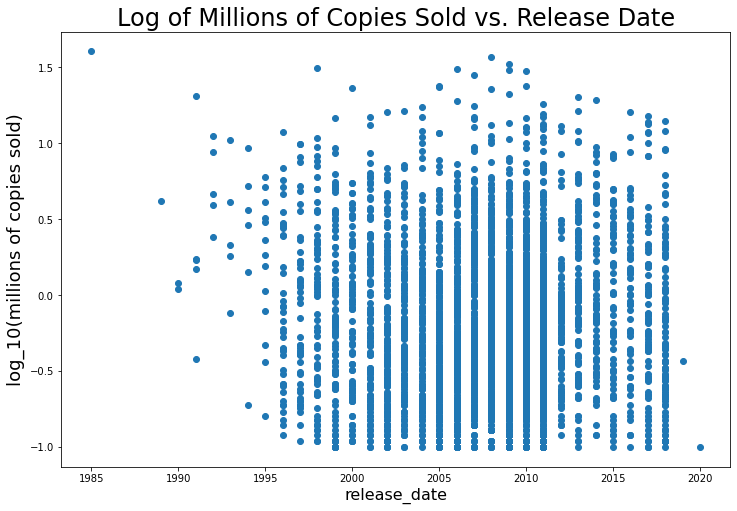

In [10]:
# A log transformation helps normalize the data

plt.figure(figsize=(12,8))
myplot = plt.scatter(df['Year'],df['Total_Shipped'].apply(np.log10))
plt.title('Log of Millions of Copies Sold vs. Release Date', fontsize = 24)
plt.ylabel('log_10(millions of copies sold)', fontsize=18);
plt.xlabel('release_date', fontsize=16);

# Start here for different areas:

- US, JP, Other, and Pasific Asia

In [11]:
# Convert from pandas Timestamp to python datetime
# df = pd.read_csv("Tio_VGChartzPrep.csv")
# Comment this based on what analysis that we want
experiment = 'pal'
## Global sales
# df = df
## JP sales
# df = df_jp
## NA sales
# df = df_na
## PAL sales
df = df_pal
## Other sales
# df = df_other


df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.head()

,Unnamed: 0,index,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,status,Vgchartzscore,average_rating
1,1,344,Teenage Mutant Ninja Turtles,Platform,NaN,NES,Ultra Games,Konami,5.9,NaN,4.17,3.38,0.44,0.31,0.04,1989-01-01,1,NaN,5.9
14,14,921,SimCity 2000,Simulation,E,PC,Maxis,Maxis,8.0,NaN,2.14,1.20,0.84,NaN,0.10,1993-01-01,1,NaN,8.0
23,23,426,Doom II,Shooter,M,PC,GT Interactive,id Software,9.3,NaN,3.61,2.05,1.40,NaN,0.16,1994-01-01,1,NaN,9.3
28,28,2228,Virtua Fighter,Fighting,T,SAT,Sega,Sega-AM2,9.0,NaN,1.07,0.17,0.12,0.77,0.02,1995-01-01,1,NaN,9.0
30,30,9873,King's Field,Role-Playing,T,PS,ASCII Entertainment,From Software,7.1,NaN,0.16,0.09,0.06,NaN,0.01,1995-01-01,1,NaN,7.1


In [12]:
df['years_since_release'] = (dt.datetime.now() - df['Year'])
df.head()

,Unnamed: 0,index,Name,Genre,ESRB_Rating,Platform,Publisher,Developer,Critic_Score,User_Score,Total_Shipped,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,status,Vgchartzscore,average_rating,years_since_release
1,1,344,Teenage Mutant Ninja Turtles,Platform,NaN,NES,Ultra Games,Konami,5.9,NaN,4.17,3.38,0.44,0.31,0.04,1989-01-01,1,NaN,5.9,11795 days 11:12:26.126391
14,14,921,SimCity 2000,Simulation,E,PC,Maxis,Maxis,8.0,NaN,2.14,1.20,0.84,NaN,0.10,1993-01-01,1,NaN,8.0,10334 days 11:12:26.126391
23,23,426,Doom II,Shooter,M,PC,GT Interactive,id Software,9.3,NaN,3.61,2.05,1.40,NaN,0.16,1994-01-01,1,NaN,9.3,9969 days 11:12:26.126391
28,28,2228,Virtua Fighter,Fighting,T,SAT,Sega,Sega-AM2,9.0,NaN,1.07,0.17,0.12,0.77,0.02,1995-01-01,1,NaN,9.0,9604 days 11:12:26.126391
30,30,9873,King's Field,Role-Playing,T,PS,ASCII Entertainment,From Software,7.1,NaN,0.16,0.09,0.06,NaN,0.01,1995-01-01,1,NaN,7.1,9604 days 11:12:26.126391


In [13]:
del df['Unnamed: 0']

In [14]:
# Grabbed from 2020 top revenue publishers, mergers like activision blizzard are split to identify games released 
# independently.
def in_top_10_publishers(publisher_name):
    publisher_name = publisher_name.lower()
    top_publishers = ['sony','microsoft','nintendo',\
                  'activision','blizzard','bandai','namco','square','enix'\
                 'ubisoft','electronic arts','ea sports']
    for top_pub in top_publishers:
        if top_pub in publisher_name:
            return True
    return False
df['top_10_publisher'] = df['Publisher'].apply(lambda x: in_top_10_publishers(x))

In [15]:
# Comment this based on what analysis that we want
## Global sales
# df.rename(columns={'Total_Shipped':'total_shipped_in_mil'}, inplace=True)
## JP sales
# df.rename(columns={'JP_Sales':'total_shipped_in_mil'}, inplace=True)
## NA sales
# df.rename(columns={'NA_Sales':'total_shipped_in_mil'}, inplace=True)
## PAL sales
df.rename(columns={'PAL_Sales':'total_shipped_in_mil'}, inplace=True)

## Other sales
# df.rename(columns={'Other_Sales':'total_shipped_in_mil'}, inplace=True)




In [16]:
df['years_since_release'] = (dt.datetime.now().toordinal()-\
                             df['Year'].apply(lambda x: dt.date.toordinal(x)))/365

In [17]:
df_features = df[['total_shipped_in_mil','years_since_release','average_rating','top_10_publisher',
                    'Genre', 'Platform']].copy()

In [18]:
# df_features.to_csv('./Tio_df_with_features.csv')
# df_features = pd.read_csv('./Tio_df_with_features.csv')

In [19]:
df_features.head()

,total_shipped_in_mil,years_since_release,average_rating,top_10_publisher,Genre,Platform
1,0.44,32.315068,5.9,False,Platform,NES
14,0.84,28.312329,8.0,False,Simulation,PC
23,1.40,27.312329,9.3,False,Shooter,PC
28,0.12,26.312329,9.0,False,Fighting,SAT
30,0.06,26.312329,7.1,False,Role-Playing,PS


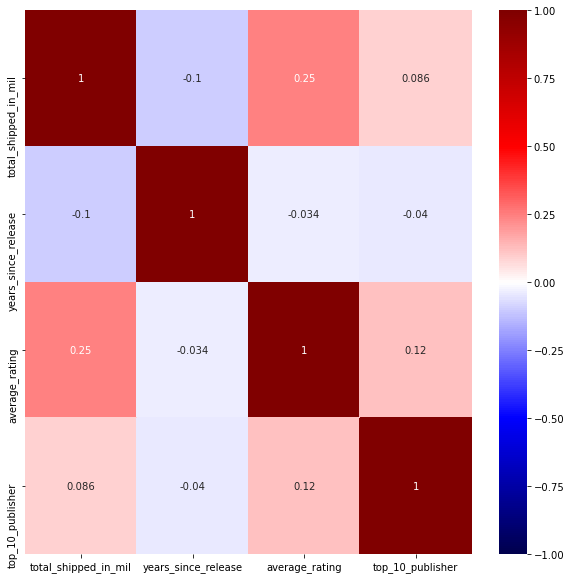

In [20]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df_features.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1,ax = ax);
fig.savefig(experiment + "sales_heatmap.png")

In [21]:
def patsy_string_from_df(df_features):
    patsy_string = df_features.columns[0] + " ~ "
    print('Predicted variable: ' + df_features.columns[0])
    for title in df_features.columns[1:]:
        patsy_string += title + " + "
    #remove last plus and spaces from string
    patsy_string=patsy_string[:-3]
    print(patsy_string)
    return patsy_string


In [22]:
def sm_OLS_model(df_features):
    y, X = patsy.dmatrices(patsy_string_from_df(df_features), data=df_features, return_type="dataframe")
    model = sm.OLS(y, X)
    # Fit your model to your training set
    fit = model.fit()

    # Print summary statistics of the model's performance
    return fit

In [23]:
df_features.sort_values(by = 'total_shipped_in_mil',ascending= False)
df_features.head()

,total_shipped_in_mil,years_since_release,average_rating,top_10_publisher,Genre,Platform
1,0.44,32.315068,5.9,False,Platform,NES
14,0.84,28.312329,8.0,False,Simulation,PC
23,1.40,27.312329,9.3,False,Shooter,PC
28,0.12,26.312329,9.0,False,Fighting,SAT
30,0.06,26.312329,7.1,False,Role-Playing,PS


In [24]:
# It looks like release date proximity to holidays doesn't really have an impact on total sales. Let's drop those
patsy_string_from_df(df_features)

Predicted variable: total_shipped_in_mil
total_shipped_in_mil ~ years_since_release + average_rating + top_10_publisher + Genre + Platform


'total_shipped_in_mil ~ years_since_release + average_rating + top_10_publisher + Genre + Platform'

In [25]:
fit1=sm_OLS_model(df_features)
fit1.summary()

Predicted variable: total_shipped_in_mil
total_shipped_in_mil ~ years_since_release + average_rating + top_10_publisher + Genre + Platform


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     total_shipped_in_mil   R-squared:                       0.180
Model:                              OLS   Adj. R-squared:                  0.168
Method:                   Least Squares   F-statistic:                     15.17
Date:                  Sun, 18 Apr 2021   Prob (F-statistic):           6.22e-98
Time:                          11:12:38   Log-Likelihood:                -2707.4
No. Observations:                  3009   AIC:                             5503.
Df Residuals:                      2965   BIC:                             5767.
Df Model:                            43                                         
Covariance Type:              nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.6401      0.094     -6.795      0.000      -0.825      -0.455
top_10_publisher[T.True]      0.0640      0.023      2.787      0.005       0.019       0.109
Genre[T.Action-Adventure]    -0.1019      0.082     -1.239      0.215      -0.263       0.059
Genre[T.Adventure]           -0.0960      0.053     -1.810      0.070      -0.200       0.008
Genre[T.Board Game]           0.1809      0.605      0.299      0.765      -1.005       1.367
Genre[T.Fighting]            -0.2033      0.053     -3.853      0.000      -0.307      -0.100
Genre[T.MMO]                 -0.2877      0.303     -0.951      0.342      -0.881       0.306
Genre[T.Misc]                -0.0811      0.053     -1.528      0.127      -0.185       0.023
Genre[T.Music]               -0.2245      0.159     -1.415      0.157      -0.535       0.087
Genre[T.Party]                0.0322      0.276      0.117      0.907      -0.508       0.573
Genre[T.Platform]            -0.0709      0.047     -1.513      0.130      -0.163       0.021
Genre[T.Puzzle]              -0.2120      0.087     -2.440      0.015      -0.382      -0.042
Genre[T.Racing]              -0.0303      0.047     -0.649      0.517      -0.122       0.061
Genre[T.Role-Playing]        -0.2572      0.042     -6.085      0.000      -0.340      -0.174
Genre[T.Sandbox]              0.0964      0.605      0.159      0.873      -1.090       1.283
Genre[T.Shooter]              0.0142      0.040      0.353      0.724      -0.065       0.093
Genre[T.Simulation]          -0.0097      0.064     -0.151      0.880      -0.135       0.116
Genre[T.Sports]              -0.0148      0.041     -0.357      0.721      -0.096       0.066
Genre[T.Strategy]            -0.2568      0.069     -3.715      0.000      -0.392      -0.121
Platform[T.DC]               -0.2445      0.316     -0.774      0.439      -0.864       0.375
Platform[T.DS]                0.0362      0.079      0.459      0.646      -0.119       0.191
Platform[T.GB]                0.0052      0.608      0.009      0.993      -1.186       1.197
Platform[T.GBA]              -0.0792      0.094     -0.843      0.399      -0.263       0.105
Platform[T.GBC]              -0.0099      0.436     -0.023      0.982      -0.865       0.845
Platform[T.GC]               -0.2012      0.090     -2.242      0.025      -0.377      -0.025
Platform[T.N64]              -0.1880      0.126     -1.489      0.136      -0.435       0.059
Platform[T.NES]               0.2266      0.618      0.366      0.714      -0.986       1.439
Platform[T.NS]                0.0553      0.098      0.566      0.571      -0.136       0.247
Platform[T.PC]                0.1610      0.082      1.970      0.049       0.001       0.321
Platform[T.PS]                0.1020      0.110      

# Plot of residuals vs. predicted z score

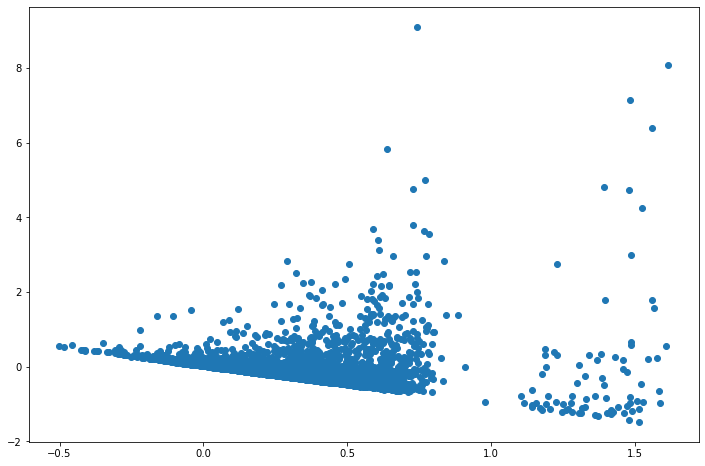

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(fit1.predict(), fit1.resid);

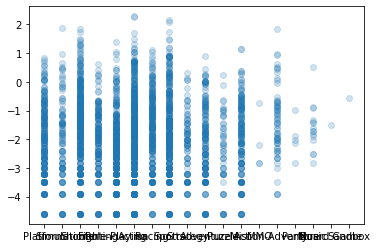

In [27]:
a = plt.scatter(df_features['Genre'],
            df_features['total_shipped_in_mil'].apply(lambda x:np.log(x)),alpha = .2)
plt.savefig(experiment + 'sales_genre.png')

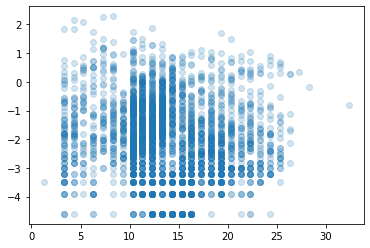

In [28]:
plt.scatter(df_features['years_since_release'],
            df_features['total_shipped_in_mil'].apply(lambda x:np.log(x)),alpha = .2)
plt.savefig(experiment + 'sales_yearrelease.png')

In [29]:
# df_features.to_csv('./Tio_df_with_features.csv')
# df_features = pd.read_csv('./Tio_df_with_features.csv')
# df_features.drop()
df_features = df[['total_shipped_in_mil','years_since_release','average_rating','top_10_publisher',
                    'Genre', 'Platform']].copy()
df_features.head()

,total_shipped_in_mil,years_since_release,average_rating,top_10_publisher,Genre,Platform
1,0.44,32.315068,5.9,False,Platform,NES
14,0.84,28.312329,8.0,False,Simulation,PC
23,1.40,27.312329,9.3,False,Shooter,PC
28,0.12,26.312329,9.0,False,Fighting,SAT
30,0.06,26.312329,7.1,False,Role-Playing,PS


In [30]:
df_features['total_shipped_in_mil_log'] = df_features['total_shipped_in_mil'].apply(lambda x:np.log(x))
df_features_with_predicted=df_features
df_features_with_predicted['total_shipped_in_thousands'] = df_features_with_predicted['total_shipped_in_mil'] * 1000

In [31]:
df_features = df_features.drop(columns = 'total_shipped_in_mil')

In [32]:
df_features.columns

Index(['years_since_release', 'average_rating', 'top_10_publisher', 'Genre',
       'Platform', 'total_shipped_in_mil_log', 'total_shipped_in_thousands'],
      dtype='object')

In [33]:
#Scaling y values in addition to features
scaler = StandardScaler()
scaled_vals = scaler.fit_transform(df_features[['average_rating','years_since_release']])
scaled_features = pd.DataFrame(scaled_vals,columns = ['rating_scaled',
                                                      'years_since_release_scaled'])
scaled_features['top_10_publisher'] = df_features.reset_index()['top_10_publisher']

In [34]:
scaled_features.insert(0,'total_shipped_in_mil_log',df_features['total_shipped_in_mil_log'].values)

In [35]:
# Lambda to calculate scaling power
lamb=stats.boxcox_normmax(df_features_with_predicted['total_shipped_in_thousands'],\
                          brack=(-1.9, 1.9)) # don't use "lambda" as it's a Python reserved word
print("Lambda:", lamb)
scaled_features['total_shipped_in_mil_log'] = (np.power(df_features_with_predicted['total_shipped_in_thousands'],\
                                                        lamb)-1)/lamb

Lambda: -0.024470290658681858


In [36]:
#scaled_features['total_shipped_in_mil_log'] = df_features['total_shipped_in_mil_log']
scaled_features.corr()
scaled_features.head()

,total_shipped_in_mil_log,rating_scaled,years_since_release_scaled,top_10_publisher
0,NaN,-1.057539,3.857865,False
1,5.655169,0.507965,3.027308,False
2,NaN,1.477086,2.819811,False
3,NaN,1.253443,2.612313,False
4,NaN,-0.162965,2.612313,False


In [37]:
scaled_model = sm_OLS_model(scaled_features)
scaled_model.save(experiment + "_sales_model.pickle")

Predicted variable: total_shipped_in_mil_log
total_shipped_in_mil_log ~ rating_scaled + years_since_release_scaled + top_10_publisher


In [38]:
scaled_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     total_shipped_in_mil_log   R-squared:                       0.004
Model:                                  OLS   Adj. R-squared:                  0.003
Method:                       Least Squares   F-statistic:                     3.058
Date:                      Sun, 18 Apr 2021   Prob (F-statistic):             0.0273
Time:                              11:12:50   Log-Likelihood:                -3664.8
No. Observations:                      2266   AIC:                             7338.
Df Residuals:                          2262   BIC:                             7360.
Df Model:                                 3                                         
Covariance Type:                  nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      4.5030      0.034    133.089      0.000       4.437       4.569
top_10_publisher[T.True]       0.0270      0.052      0.515      0.606      -0.076       0.130
rating_scaled                  0.0091      0.026      0.354      0.724      -0.041       0.059
years_since_release_scaled    -0.0774      0.026     -2.923      0.004      -0.129      -0.025
==============================================================================
Omnibus:                       67.639   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.998
Skew:                           0.039   Prob(JB):                     6.83e-08
Kurtosis:                       2.414   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

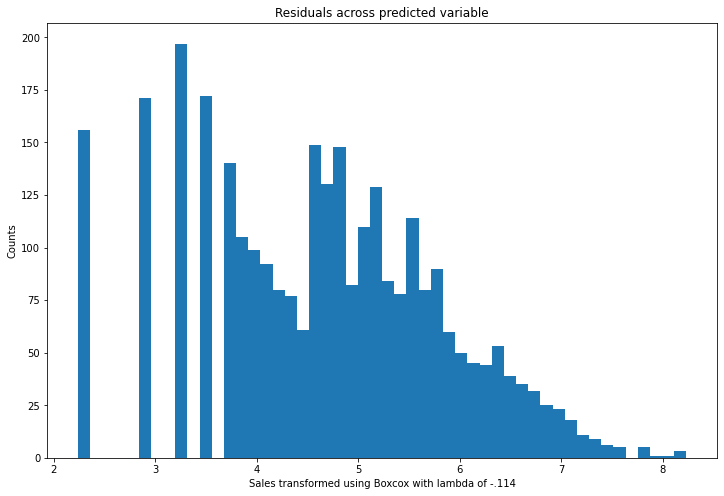

In [39]:
y_t=(np.power(df_features_with_predicted['total_shipped_in_thousands'],lamb)-1)/lamb
#plt.hist(df_features_with_predicted['total_shipped_in_thousands'])
plt.figure(figsize=(12,8))
plt.xlabel("Sales transformed using Boxcox with lambda of -.114")
plt.ylabel("Counts")
plt.title('Residuals across predicted variable');
plt.hist(y_t,bins = 50);

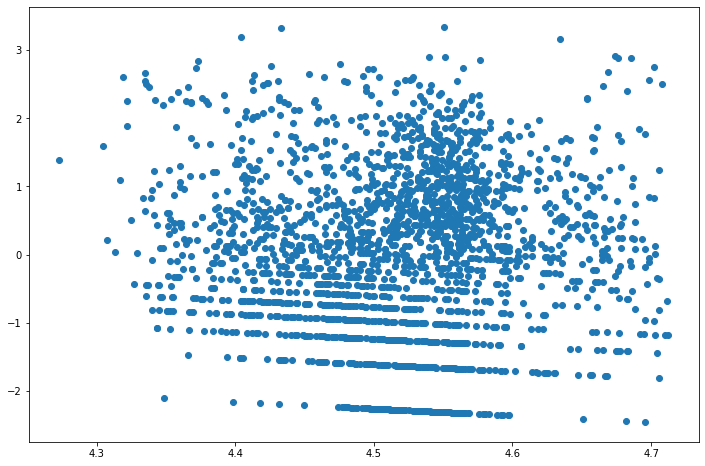

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(scaled_model.predict(), scaled_model.resid);

In [41]:
scaled_features.head()

,total_shipped_in_mil_log,rating_scaled,years_since_release_scaled,top_10_publisher
0,NaN,-1.057539,3.857865,False
1,5.655169,0.507965,3.027308,False
2,NaN,1.477086,2.819811,False
3,NaN,1.253443,2.612313,False
4,NaN,-0.162965,2.612313,False


In [42]:
 scaled_features.iloc[:,1:].head()

,rating_scaled,years_since_release_scaled,top_10_publisher
0,-1.057539,3.857865,False
1,0.507965,3.027308,False
2,1.477086,2.819811,False
3,1.253443,2.612313,False
4,-0.162965,2.612313,False


[nan 25.506369457567533 nan ... 21.15306038113982 nan 19.591517447342525]
nan
nan
RMSE:  nan
MAE:  nan


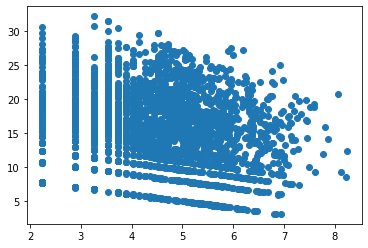

In [43]:
# Calculate root mean squared error
ypred = scaled_model.predict(scaled_features.iloc[:,0:].values)
print(ypred)
yval = ((np.power(df_features_with_predicted['total_shipped_in_thousands'],lamb)-1)/lamb).values
residuals_squared = list()
residuals_abs = list()
residuals = list()
for i in range(0,len(yval)):
    residuals.append(ypred[i]-yval[i])
    residuals_squared.append((ypred[i]-yval[i])**2)
    residuals_abs.append(abs(ypred[i] - yval [i]))

rmse = np.sqrt(sum(residuals_squared)/len(yval))
mae = sum(residuals_abs)/len(yval)

print(rmse/40000)
print(mae/40000)
print("RMSE: ",rmse)
print("MAE: ", mae)
plt.scatter(yval,residuals)



Text(0.5, 0, 'Z score')

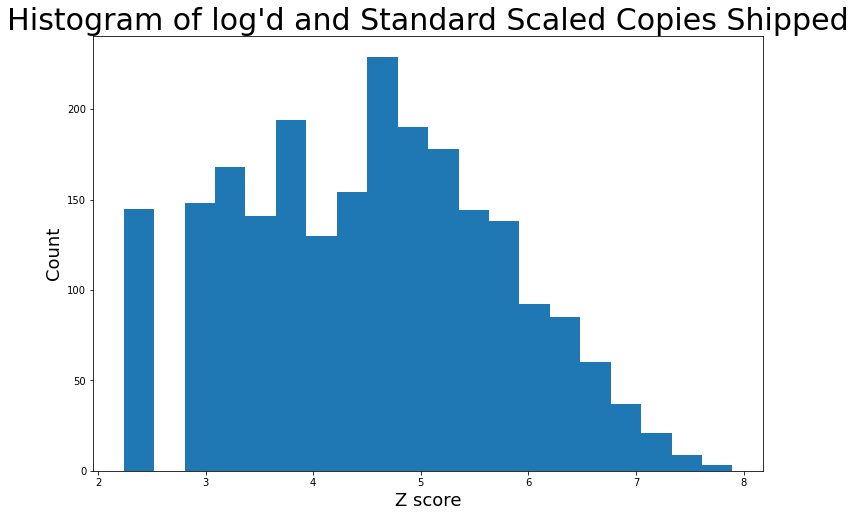

In [44]:
plt.figure(figsize=(12,8))
plt.hist(scaled_features['total_shipped_in_mil_log'],bins = 20)
plt.title("Histogram of log'd and Standard Scaled Copies Shipped",fontsize = 30)
plt.ylabel('Count',fontsize = 18)
plt.xlabel('Z score',fontsize = 18)

In [45]:
df_features_with_predicted.head()

,total_shipped_in_mil,years_since_release,average_rating,top_10_publisher,Genre,Platform,total_shipped_in_mil_log,total_shipped_in_thousands
1,0.44,32.315068,5.9,False,Platform,NES,-0.820981,440.0
14,0.84,28.312329,8.0,False,Simulation,PC,-0.174353,840.0
23,1.40,27.312329,9.3,False,Shooter,PC,0.336472,1400.0
28,0.12,26.312329,9.0,False,Fighting,SAT,-2.120264,120.0
30,0.06,26.312329,7.1,False,Role-Playing,PS,-2.813411,60.0


In [46]:
df_features_with_predicted=df_features_with_predicted.drop(columns = ['total_shipped_in_mil','total_shipped_in_mil_log'])

In [47]:

df_features_with_predicted.head()

,years_since_release,average_rating,top_10_publisher,Genre,Platform,total_shipped_in_thousands
1,32.315068,5.9,False,Platform,NES,440.0
14,28.312329,8.0,False,Simulation,PC,840.0
23,27.312329,9.3,False,Shooter,PC,1400.0
28,26.312329,9.0,False,Fighting,SAT,120.0
30,26.312329,7.1,False,Role-Playing,PS,60.0


In [48]:
df_features.head()

,years_since_release,average_rating,top_10_publisher,Genre,Platform,total_shipped_in_mil_log,total_shipped_in_thousands
1,32.315068,5.9,False,Platform,NES,-0.820981,440.0
14,28.312329,8.0,False,Simulation,PC,-0.174353,840.0
23,27.312329,9.3,False,Shooter,PC,0.336472,1400.0
28,26.312329,9.0,False,Fighting,SAT,-2.120264,120.0
30,26.312329,7.1,False,Role-Playing,PS,-2.813411,60.0


In [49]:
#for i in np.linspace(95,99.75,20):
 #   print(i,np.percentile(yval,i))
np.percentile(yval,95)

6.617854964537495

Choose 99% as my upper outlier cutoff

In [50]:
df_features_with_predicted =\
df_features_with_predicted.loc[df_features_with_predicted['total_shipped_in_thousands'] < 4600]
df_features_with_predicted.shape

(2999, 6)

In [51]:
#Not log'd
y = df_features_with_predicted['total_shipped_in_thousands'].values

# Can't use log'd data because poisson requires integer predictions?
#y = df_features.iloc[:,-1].values
X = df_features_with_predicted.iloc[:,:3].values
y
X

array([[32.31506849315068, 5.9, False],
       [28.312328767123287, 8.0, False],
       [27.312328767123287, 9.3, False],
       ...,
       [3.2958904109589042, 8.1, True],
       [3.2958904109589042, 4.55, False],
       [1.295890410958904, 7.5, False]], dtype=object)

In [52]:
# Cast variables to correct datatypes
y = y.astype(int)
X = X.astype(float)

In [53]:
# Fit GLM in statsmodels using Poisson link function
#poisson_model = sm.GLM(y, X, family = sm.families.Poisson())
poisson_model = sm.GLM(y, X, family = sm.families.NegativeBinomial())


poisson_result = poisson_model.fit()
poisson_result.summary()
poisson_result.save(experiment + "_sales_possion_model.pickle")

In [54]:
df_features.iloc[:,:-1].columns

Index(['years_since_release', 'average_rating', 'top_10_publisher', 'Genre',
       'Platform', 'total_shipped_in_mil_log'],
      dtype='object')

RMSE / max_val:  0.0488
MAE / max_val:  0.032
RMSE:  585.0601593300864
MAE:  384.52363009893025


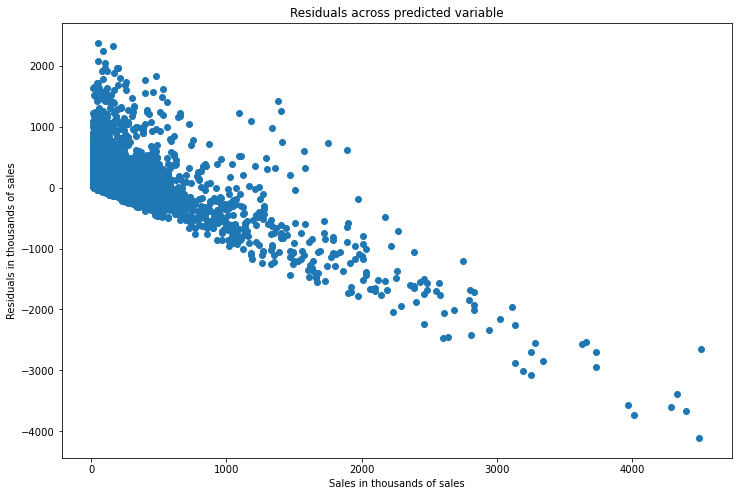

In [55]:
# Calculate root mean squared error
ypred = poisson_result.predict(X)
yval = df_features_with_predicted.iloc[:,-1].values
residuals_squared = list()
residuals_abs = list()
residuals = list()
for i in range(0,len(yval)):
    residuals.append(ypred[i]-yval[i])
    residuals_squared.append((ypred[i]-yval[i])**2)
    residuals_abs.append(abs(ypred[i] - yval [i]))

rmse = np.sqrt(sum(residuals_squared)/len(yval))
mae = sum(residuals_abs)/len(yval)
max_val = 12000
print("RMSE / max_val: " ,(rmse/max_val).round(4))
print("MAE / max_val: ",(mae/max_val).round(4))
print("RMSE: ",rmse)
print("MAE: ", mae)
plt.figure(figsize=(12,8))
plt.scatter(yval,residuals)
plt.xlabel("Sales in thousands of sales")
plt.ylabel("Residuals in thousands of sales")
plt.title('Residuals across predicted variable');
plt.savefig(experiment+'sales_residual')

In [56]:
df_final = df_features_with_predicted
df_final['pred'] = ypred

In [57]:
df_final.head()

,years_since_release,average_rating,top_10_publisher,Genre,Platform,total_shipped_in_thousands,pred
1,32.315068,5.9,False,Platform,NES,440.0,419.568780
14,28.312329,8.0,False,Simulation,PC,840.0,1231.568634
23,27.312329,9.3,False,Shooter,PC,1400.0,2656.850128
28,26.312329,9.0,False,Fighting,SAT,120.0,2043.286129
30,26.312329,7.1,False,Role-Playing,PS,60.0,600.334009


In [58]:
df_final.to_csv("final_df_" + experiment + ".csv")

In [59]:
# Load model or more generally
from statsmodels.iolib.smpickle import load_pickle
new_results = load_pickle(experiment + "_sales_possion_model.pickle")

In [212]:
new_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 2999
Model:                            GLM   Df Residuals:                     2996
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20688.
Date:                Thu, 15 Apr 2021   Deviance:                       5944.5
Time:                        00:11:42   Pearson chi2:                 2.04e+04
No. Iterations:                    16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0692      0.003     20.665      0.000       0.063       0.076
x2             0.6447      0.007     93.286      0.000       0.631       0.658
x3             0.2092      0.037      5.604      0.000       0.136       0.282
==============================================================================
"""

In [213]:
df_arbitray_value = np.array([30, 6.00, False])
print(df_arbitray_value)
# test = scaled_features.iloc[:,0:].values
ypred = poisson_result.predict(df_arbitray_value)
print(ypred)

[30.  6.  0.]
[381.38316585]
